Draw bounding boxes on images using the coordinate system that tensorflow adopt. This uses relative potiion to top left hand corener of image. PIL instead uses pixel position, but this depends on the image size. Therefore using relative position is better for tracking location of objects in image

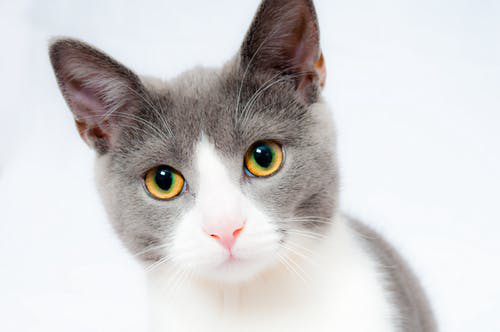

In [1]:
from PIL import Image, ImageDraw
from typing import List, Set, Dict, Tuple, Optional

yellow=(255, 255, 0)
red=(255, 0, 0)

infile = "cat.jpg"
img = Image.open(infile)
img

In [2]:
img.size

(500, 332)

In [3]:
img_width = img.size[0]
img_height = img.size[1]

The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate.

In [4]:
## Using relative position in image

def draw_box(draw : ImageDraw, 
             box : Tuple[float, float, float, float], 
             img_width : int, 
             img_height : int, 
             text: str = "", 
             color=(255, 255, 0)):

    """
    Draw a bounding box on and image.
    The box is a 4-tuple defining x-y coordinates in the range 0-1 relative to the
    top left corner of the image, where x is the horizontlal axis of the image and 
    y the vertical axis of the image."""
    linewidth = 5
    ymin, xmin, ymax, xmax = box
    (left, right, top, bottom) = (
        xmin * img_width,
        xmax * img_width,
        ymin * img_height,
        ymax * img_height,
    )
    draw.line(
        [(left, top), (left, bottom), (right, bottom), (right, top), (left, top)],
        width=linewidth,
        fill=color,
    )
    if text:
        draw.text((left + linewidth, abs(top - 15)), text, fill=color)

In [5]:
ymin=0
ymax=0.5
xmin=0
xmax=0.5

box_1 = (ymin, xmin, ymax, xmax)
box_1

(0, 0, 0.5, 0.5)

In [6]:
draw = ImageDraw.Draw(img)

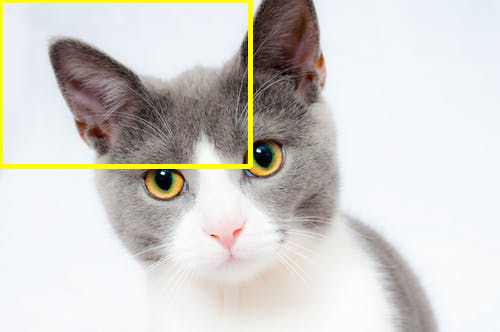

In [7]:
draw_box(draw, box_1, img_width, img_height, color=yellow)

img

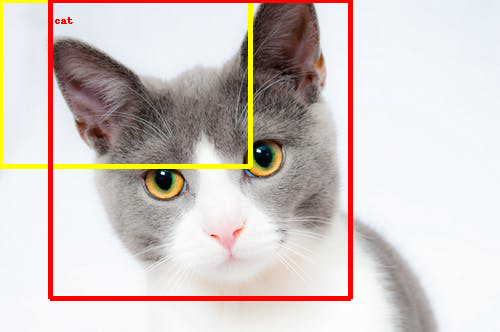

In [8]:
ymin=0
ymax=0.9
xmin=0.1
xmax=0.7

box_2 = (ymin, xmin, ymax, xmax)
box_2

draw_box(draw, box_2, img_width, img_height, text="cat", color=red)

img